# Using a Stewart Platform as a Motion Simulator
This contains the test code for the platform.

C:\Users\User\AppData\Local\Programs\Python\Python36\envs\stewart_py2\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


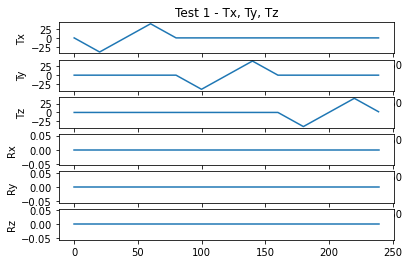

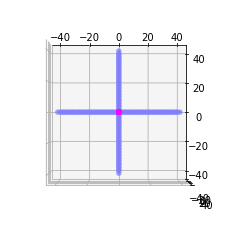

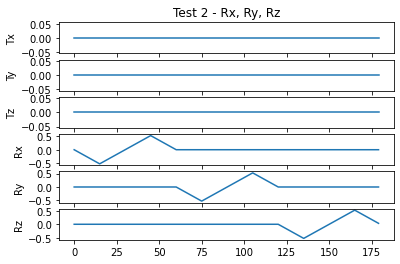

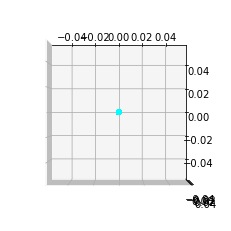

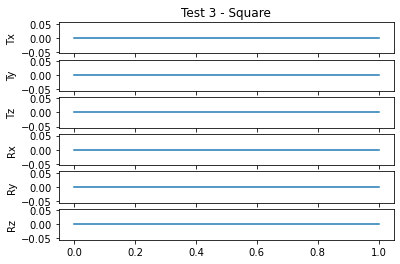

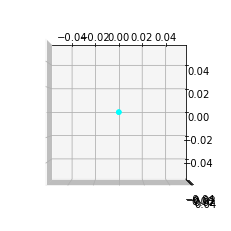

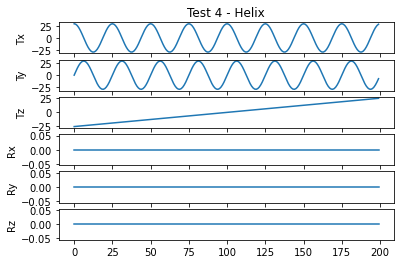

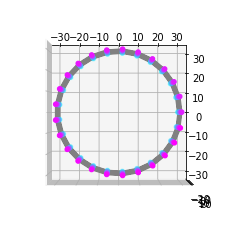

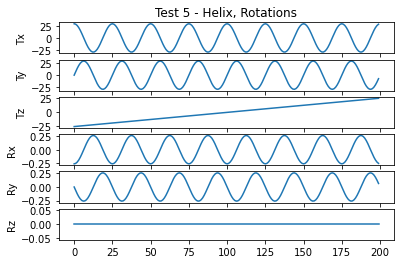

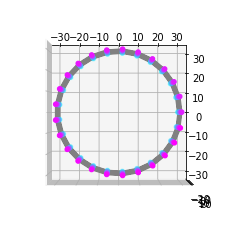

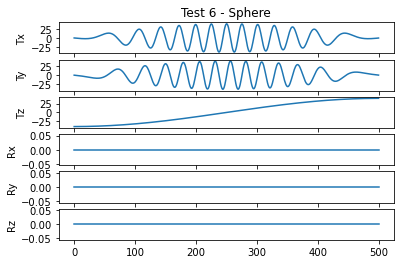

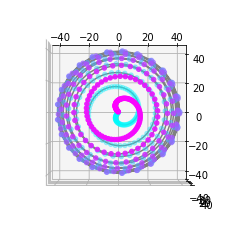

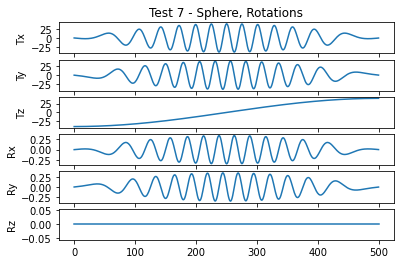

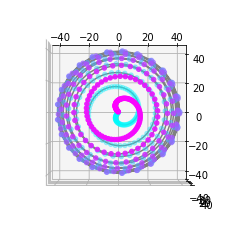

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import serial
from src.stewart_controller import Stewart_Platform

def setupSerial(COM, BAUD):
    # Initialize serial
    ser = serial.Serial()
    ser.port = COM
    ser.baudrate = BAUD
    ser.setDTR(False)
    ser.setRTS(False)
    # ser.close()

    if not ser.isOpen():
        ser.open()
        
    return ser

# Test 1 - Tx, Ty, Tz
RANGE = np.concatenate((np.arange(0, -40, -2), np.arange(-40, 40, 2), np.arange(40, 0, -2)))
zeros = [np.array(np.repeat(0,np.shape(RANGE)))]
rotations = [RANGE]

test1_1 = np.concatenate((rotations, zeros, zeros, zeros, zeros, zeros), axis=0).T
test1_2 = np.concatenate((zeros, rotations, zeros, zeros, zeros, zeros), axis=0).T
test1_3 = np.concatenate((zeros, zeros, rotations, zeros, zeros, zeros), axis=0).T
test1 = np.concatenate((test1_1, test1_2, test1_3), axis=0)

# Test 2 - Rx, Ry, Rz
RANGE = np.concatenate((np.arange(0, -30, -2), np.arange(-30, 30, 2), np.arange(30, 0, -2)))/180*np.pi
zeros = [np.array(np.repeat(0,np.shape(RANGE)))]
rotations = [RANGE]

test2_1 = np.concatenate((zeros, zeros, zeros, rotations, zeros, zeros), axis=0).T
test2_2 = np.concatenate((zeros, zeros, zeros, zeros, rotations, zeros), axis=0).T
test2_3 = np.concatenate((zeros, zeros, zeros, zeros, zeros, rotations), axis=0).T
test2 = np.concatenate((test2_1, test2_2, test2_3), axis=0)

# # Test 3 - Square
RANGE = np.arange(0, 2)
zeros = [np.array(np.repeat(0,np.shape(RANGE)))]
test3 = np.concatenate((zeros, zeros, zeros, zeros, zeros, zeros), axis=0).T

# Test 4 - Helix
Tz = np.arange(-np.pi*10*0.8,np.pi*10*0.8,np.pi/10*0.8)
Ty = 30*np.sin(Tz)
Tx = 30*np.cos(Tz)
Rx = np.array(np.repeat(0,np.shape(Tx)))
Ry = np.array(np.repeat(0,np.shape(Tx)))
Rz = np.array(np.repeat(0,np.shape(Tx)))
test4 = np.concatenate(([Tx],[Ty],[Tz],[Rx],[Ry],[Rz]), axis=0).T

# Test 5 - Helix, Rotations
Tz = np.arange(-np.pi*10*0.8,np.pi*10*0.8,np.pi/10*0.8)
Ty = 30*np.sin(Tz)
Tx = 30*np.cos(Tz)
Rx = -Tx/180*np.pi /2
Ry = -Ty/180*np.pi /2
Rz = np.array(np.repeat(0,np.shape(Tx)))
test5 = np.concatenate(([Tx],[Ty],[Tz],[Rx],[Ry],[Rz]), axis=0).T

# Test 6 - Sphere
theta = np.arange(-np.pi/2,np.pi/2,np.pi/500)
Tz = np.sin(theta)*40
r = np.cos(theta)*40
Ty = r*np.sin(Tz)
Tx = r*np.cos(Tz)
Rx = np.array(np.repeat(0,np.shape(Tx)))
Ry = np.array(np.repeat(0,np.shape(Tx)))
Rz = np.array(np.repeat(0,np.shape(Tx)))
test6 = np.concatenate(([Tx],[Ty],[Tz],[Rx],[Ry],[Rz]), axis=0).T

# Test 7 - Sphere, Rotations
theta = np.arange(-np.pi/2,np.pi/2,np.pi/500)
Tz = np.sin(theta)*40
r = np.cos(theta)*40
Ty = r*np.sin(Tz)
Tx = r*np.cos(Tz)
Rx = -Tx/180*np.pi /2
Ry = -Ty/180*np.pi /2
Rz = np.array(np.repeat(0,np.shape(Tx)))
test7 = np.concatenate(([Tx],[Ty],[Tz],[Rx],[Ry],[Rz]), axis=0).T

exercise = list([test1, test2, test3, test4, test5, test6, test7])

exercise_names = list([
        'Test 1 - Tx, Ty, Tz',
        'Test 2 - Rx, Ry, Rz',
        'Test 3 - Square',
        'Test 4 - Helix',
        'Test 5 - Helix, Rotations',
        'Test 6 - Sphere',
        'Test 7 - Sphere, Rotations',
])

labels = list(['Tx', 'Ty', 'Tz', 'Rx', 'Ry', 'Rz'])

for exercise_index in range(7):
        movements = exercise[exercise_index]
        plt.figure()
        
        for i in range(6):
                plt.subplot(611+i)
                if(i == 0):
                        plt.title(exercise_names[exercise_index])
                plt.plot(movements[:,i]) 
                plt.ylabel(labels[i])

        plt.figure() 
        ax = plt.axes(projection='3d')
        ax.scatter3D(movements[:,0], movements[:,1], movements[:,2], c=movements[:,2], cmap='cool')
        ax.plot3D(movements[:,0], movements[:,1], movements[:,2], 'gray')
        VIEW = [[10, 76], [10, 90], [90, 270],[30, 90]]
        view_index = 1
        ax.view_init(elev=VIEW[view_index][0], azim=VIEW[view_index][1]) # Suitable angle

        ax = plt.axes(projection='3d')
        ax.scatter3D(movements[:,0], movements[:,1], movements[:,2], c=movements[:,2], cmap='cool')
        ax.plot3D(movements[:,0], movements[:,1], movements[:,2], 'gray')
        view_index = 2
        ax.view_init(elev=VIEW[view_index][0], azim=VIEW[view_index][1]) # Suitable angle

np.save('exercise', exercise, allow_pickle=True, fix_imports=True)

We can then iteratively plug in translation and rotations from each timestep to simulate the motion. Total time taken is printed to ensure that there is little deviation from the real samples. 

In [2]:
ser = setupSerial('COM5', 38400)

# Call object, Stewart_Platform(r_B, r_P, lhl, ldl, Psi_B, P si_P, offset_angle)
# offset_angle of 5pi/6 is used to align the y-axis in a way that is aesthetic.

# platform = Stewart_Platform(132/2, 175/2, 50.8, 130, 0.2269, 0.82, 5*np.pi/6)
platform = Stewart_Platform(72, 88, 58, 130, 0.2269, 0.82, 5*np.pi/6)

for exercise_index in range(7):
    tic = time.time()s
    movements = exercise[exercise_index]
    [length,_] = np.shape(movements)
    for ix in range(length):
        time.sleep(0.05)
        servo_angles = platform.calculate(
            np.array([movements[ix,0], movements[ix,1], movements[ix,2]-20]), # Z axis offset by 10 (platform operates better lower)
            np.array([movements[ix,3], movements[ix,4], movements[ix,5]])  # X rotation offset by 10 degs (3D printed torso leans backwards at rest)
            )/np.pi*180 # Convert to degrees

        # Send serial data to ESP32 in the form of a string "<A,float,float,float,float,float,float>"
        towrite = np.array2string(servo_angles, precision=1, separator=',').strip('[]')
        towrite = '<A,' + towrite + '>'
        ser.write(towrite.encode())     # write a string

ser.close()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import serial
from src.stewart_controller import Stewart_Platform

platform = Stewart_Platform(72, 88, 58, 130, 0.2269, 0.82, 5*np.pi/6)

%matplotlib qt
fig, ax = plt.subplots()    

for exercise_index in range(7):
    tic = time.time()
    movements = exercise[exercise_index]
    [length,_] = np.shape(movements)
    for ix in range(length):
        # time.sleep(0.01)
        servo_angles = platform.calculate(
            np.array([movements[ix,0], movements[ix,1], movements[ix,2]-20]), # Z axis offset by 10 (platform operates better lower)
            np.array([movements[ix,3], movements[ix,4], movements[ix,5]])  # X rotation offset by 10 degs (3D printed torso leans backwards at rest)
            )/np.pi*180 # Convert to degrees

        # # Hide this plotting section if your computer takes too long to plot, affecting the controller speed
        VIEW = [[10, 76], [20, 90], [50, 50],[30, 90]]
        view_index = 0
        ax = platform.plot_platform()
        ax.view_init(elev=VIEW[view_index][0], azim=VIEW[view_index][1]) # Suitable angle
        
        plt.title(exercise_names[exercise_index])        
        plt.draw()
        plt.pause(0.5)
